 ---
 # Prática 1: Teorema de Thevenin
 ---
> Autores: Jorge del Rio Lopez, Carlos Gonzalez Garcia y Javier Rodriguez Urbano.
>
> Fecha:2024-10-21
>
> Curso 24-45 
---

In [356]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [357]:
xlsx_name="P1_sesion1_plantillaMedidas.ods"

In [358]:
DatosTarea1 = pd.read_excel(xlsx_name,sheet_name='Tarea1',usecols='A:D')
Rmedida1=DatosTarea1["R1"].tolist()
Rmedida2=DatosTarea1["R2"].tolist()
Rmedida3=DatosTarea1["R3"].tolist()
Rmedida4=DatosTarea1["R4"].tolist()
print(f'Las medidas de las resistencias son: \nR1 Teorico: {Rmedida1[0]}    R1 Práctico: {Rmedida1[1]}')
print(f'R2 Teorico: {Rmedida2[0]}   R2 Práctico: {Rmedida2[1]}')
print(f'R3 Teorico: {Rmedida3[0]}    R3 Práctico: {Rmedida3[1]}')
print(f'R4 Teorico: {Rmedida4[0]}    R4 Práctico: {Rmedida4[1]}')



Las medidas de las resistencias son: 
R1 Teorico: 4.7    R1 Práctico: 4.58
R2 Teorico: 10.0   R2 Práctico: 9.92
R3 Teorico: 2.2    R3 Práctico: 2.14
R4 Teorico: 1.5    R4 Práctico: 1.47


Con estos valores de las resistencias y tras montar el cicuito podemos obtener el valor de la resistencia Thevenin de forma practica y teórica.

<img alt='Circuito con red muerta' src = 'ResTeorica.png' >

Con la red muerta tendríamos que: $R_{12}=\frac{1}{\frac{1}{R_1} + \frac{1}{R_2}}$ y $R_{34} = \frac{1}{\frac{1}{R_3} + \frac{1}{R_4}}$.
Al estar estas dos en serie la resistencia equivalente sería la suma de ambas 


In [359]:
DatosTarea1 = pd.read_excel(xlsx_name,sheet_name='Tarea1',usecols='E')

Rmedida5 = DatosTarea1['Rab'].tolist()
print(f'Las medidas de las resistencias de Thevenin son: \nRab Teorico: {Rmedida5[0]}    Rab Práctico: {Rmedida5[1]}')

Las medidas de las resistencias de Thevenin son: 
Rab Teorico: 4.09    Rab Práctico: 4.0


Para calcular el voltaje Thevenin 





In [360]:
DatosTarea1 = pd.read_excel(xlsx_name,sheet_name='Tarea1',usecols='G')

Voltajes = DatosTarea1['Vab'].tolist()
print(f'Las medidas de los voltajes de Thevenin son: \nVab Teorico: {Voltajes[0]}    Vab Práctico: {Voltajes[1]}')

Las medidas de los voltajes de Thevenin son: 
Vab Teorico: 3.29    Vab Práctico: 3.27


Tras colocar el potenciomentro




In [361]:
DatosTarea1 = pd.read_excel(xlsx_name,sheet_name='Tarea1',usecols='G')
DatosTarea2 = pd.read_excel(xlsx_name,sheet_name='Tarea2',usecols='A:B')

Voltaje1 = DatosTarea1['Vab'].tolist()
Voltaje2 = DatosTarea2['Vab']
Rpotenciometro = DatosTarea2['Rpotenciometro']

print(fr'El voltaje Thevenin anterior es: {Voltaje1[0]} (V). Diviendolo entre dos obtenemos el voltaje: {Voltaje2[0]} (V), con el cual obtenemos una resistencia de: {Rpotenciometro[0]}.')


El voltaje Thevenin anterior es: 3.29 (V). Diviendolo entre dos obtenemos el voltaje: 1.63 (V), con el cual obtenemos una resistencia de: 4.0.


In [362]:
VoltajeThevenin = Voltaje2[0]
DatosTarea3 = pd.read_excel(xlsx_name,sheet_name='Tarea3',usecols='A:B')
#Practico
VoltajeAB = DatosTarea3['Vab'].tolist()
IntensidadAB = DatosTarea3['Iab'].tolist()
RTV = Rmedida5[1]
#Teorico
RTVTeo = Rmedida5[0]
VoltajeTeo = Voltaje1[0]

#Transformamos los vectores con numpy en arrays
VoltajeAB = np.array(VoltajeAB)
IntensidadAB = np.array(IntensidadAB)*1e-3
print(IntensidadAB)


[0.00082 0.00081 0.00068 0.00058 0.00051 0.00047 0.00038 0.00031 0.00029
 0.00026 0.00024]


Datos:
          x      y
0   0.00082  0.000
1   0.00081  0.044
2   0.00068  0.592
3   0.00058  0.993
4   0.00051  1.290
5   0.00047  1.470
6   0.00038  1.800
7   0.00031  2.060
8   0.00029  2.140
9   0.00026  2.260
10  0.00024  2.290

Datos ajuste: R= -3996.1148985368586 
Ordenada en el origen:  3.3016558824702007 
 coorel coef= [[ 1.73562172e+03 -8.44143292e-01]
 [-8.44143292e-01  4.82518617e-04]]


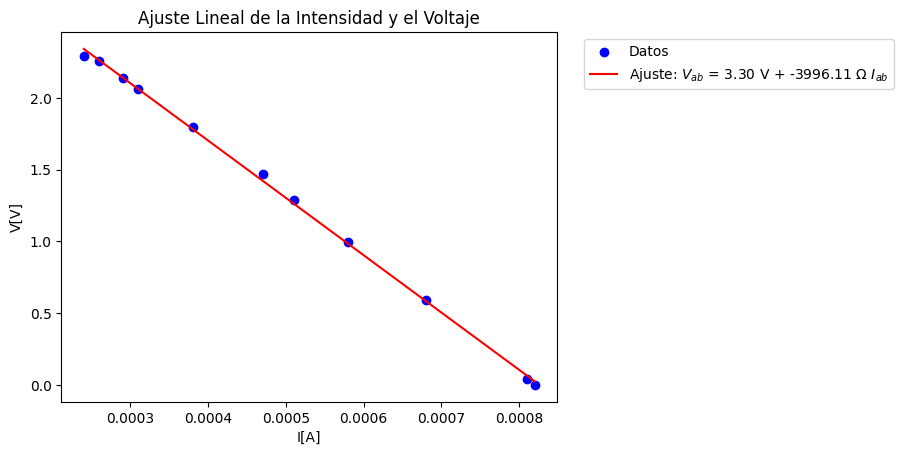

In [363]:
#Ponemos los datos en una tabla.
data = {'x': IntensidadAB,
        'y': VoltajeAB}
df = pd.DataFrame(data)
print(f'Datos:\n{df}\n')
# Realizamos el ajuste lineal con np.polyfit
print('Datos ajuste: ',end='')
[slope, intercept], r = np.polyfit(IntensidadAB,VoltajeAB,deg=1,cov=True)
print("R=", slope,"\nOrdenada en el origen: ", intercept,"\n coorel coef=",r)

# Crear una función para la línea ajustada
def ajuste_lineal(x):
    return intercept + slope * x

# Graficamos los datos y el ajuste lineal
plt.scatter(IntensidadAB, VoltajeAB, label='Datos', color='blue')
plt.plot(IntensidadAB, ajuste_lineal(IntensidadAB), color='red', label=fr'Ajuste: $V_{{ab}}$ = {intercept:.2f} V + {slope:.2f} $\Omega$ $I_{{ab}}$')
plt.xlabel('I[A]')
plt.ylabel('V[V]')
plt.title('Ajuste Lineal de la Intensidad y el Voltaje')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

In [364]:
[slope, intercept],r = np.polyfit(IntensidadAB,VoltajeAB, deg=1,cov=True)
print('Datos ajuste: ',"R=", slope,"\nOrdenada en el origen: ", intercept,"\n coorel coef=",r)

Datos ajuste:  R= -3996.1148985368586 
Ordenada en el origen:  3.3016558824702007 
 coorel coef= [[ 1.73562172e+03 -8.44143292e-01]
 [-8.44143292e-01  4.82518617e-04]]


In [365]:
Rfit=slope

Vfit0=intercept

#Genero un vector de intensidades dentro del rango medido
Ifit=np.linspace(0,0.0008,40)

#A partir de los parámetros ajustados genero el volaje
Vfit=Vfit0+Ifit*Rfit

Rteo=RTVTeo*1e3
Iteo=np.linspace(0,0.0008,50)
Vteo=VoltajeTeo-Iteo*Rteo

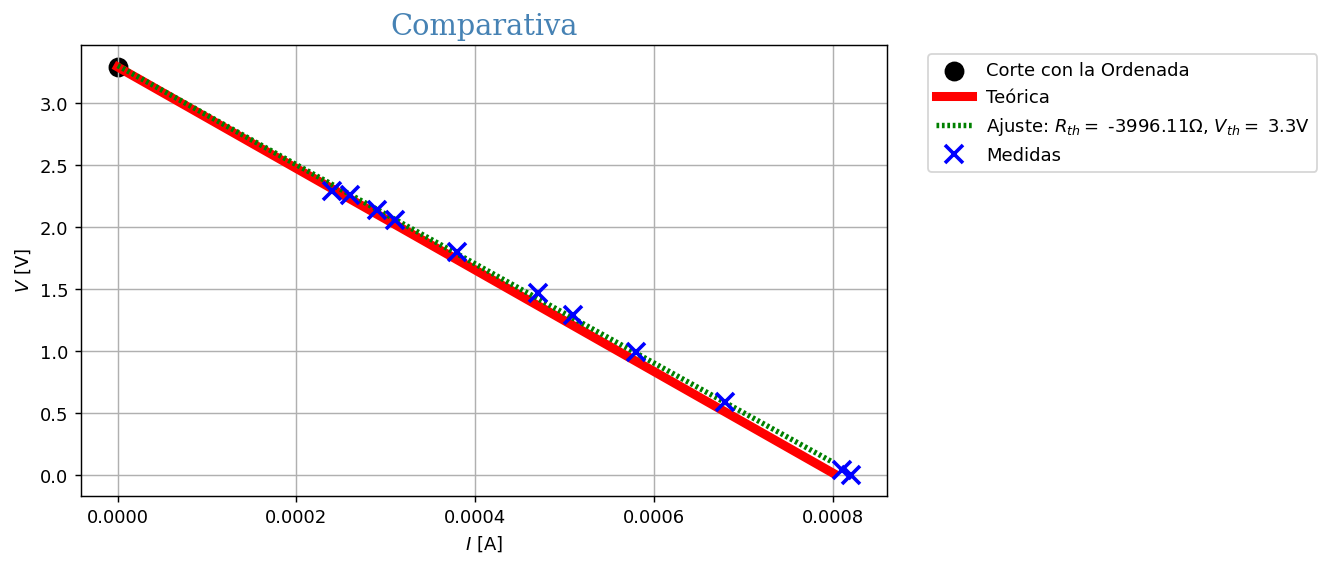

In [366]:
plt.figure(figsize=(8, 4.5), dpi=130)
plt.title("Comparativa", fontdict = {'family':'serif','color':'steelblue','size':16})
plt.scatter(0, VoltajeTeo, color="black", s=100, label="Corte con la Ordenada")
plt.plot(Iteo,Vteo, color="r", lw=5,label="Teórica")
plt.plot(Ifit,Vfit, color="green",dashes=[0.5, 0.5],lw=3,label=fr"Ajuste: $R_{{th}}=$ {round(Rfit,2)}$\Omega$, $V_{{th}}=$ {round(Vfit0,2)}V")
plt.plot(IntensidadAB,VoltajeAB, color="b",ls="",marker='x',ms=10,markeredgewidth=2,label="Medidas")
plt.xlabel(r"$I$ [A]")
plt.ylabel(r"$V$ [V]")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.grid()
plt.show()